In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn

from times import StyleScoreVAE
from ssvae_trainer import SSVAETrainer

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mf = pd.read_csv('./dataset/multifactor_score_20200228.csv', index_col=0, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
mf[mf['code'] == 'A005930']

code  trade_date      pm_5     pm_10     pm_20     pm_40     pm_60  \
540417  A005930  2013-01-16  0.307322  0.214752  0.269412  0.615642  0.538814   
540418  A005930  2013-01-17  0.275159  0.235175  0.278858  0.608623  0.549606   
540419  A005930  2013-01-18  0.273983  0.232215  0.232686  0.571636  0.521329   
540420  A005930  2013-01-21  0.249077  0.293283  0.155408  0.495594  0.501984   
540421  A005930  2013-01-22  0.252724  0.261267  0.181221  0.475156  0.530265   
...         ...         ...       ...       ...       ...       ...       ...   
542161  A005930  2020-02-24  0.481342  0.594053  0.524048  0.629722  0.570931   
542162  A005930  2020-02-25  0.621167  0.622022  0.490795  0.635911  0.574655   
542163  A005930  2020-02-26  0.544780  0.594731  0.487116  0.628956  0.568410   
542164  A005930  2020-02-27  0.623055  0.587245  0.526480  0.622305  0.569714   
542165  A005930  2020-02-28  0.545897  0.541526  0.588398  0.619075  0.568255   

           pm_90    pm_120    pm_250  ...  skew_250  turnover_5  turnover_10  \
540417  0.557029  0.584363  0.605800  ...  0.746597         1.0          1.0   
540418  0.566829  0.570318  0.606448  ...  0.745504         1.0          1.0   
540419  0.555522  0.538045  0.600005  ...  0.746695         1.0          1.0   
540420  0.552491  0.519721  0.574298  ...  0.737737         1.0          1.0   
540421  0.524139  0.514964  0.578236  ...  0.738419         1.0          1.0   
...          ...       ...       ...  ...       ...         ...          ...   
542161  0.456609  0.621955  0.587540  ...  0.504917         1.0          1.0   
542162  0.455983  0.633129  0.583706  ...  0.504948         1.0          1.0   
542163  0.574070  0.631351  0.586203  ...  0.504860         1.0          1.0   
542164  0.572765  0.635776  0.581822  ...  0.504515         1.0          1.0   
542165  0.569805  0.630483  0.577924  ...  0.504477         1.0          1.0   

        turnover_20  turnover_40  turnover_60  turnover_90  turnover_120  \
540417          1.0          1.0          1.0          1.0           1.0   
540418          1.0          1.0          1.0          1.0           1.0   
540419          1.0          1.0          1.0          1.0           1.0   
540420          1.0          1.0          1.0          1.0           1.0   
540421          1.0          1.0          1.0          1.0           1.0   
...             ...          ...          ...          ...           ...   
542161          1.0          1.0          1.0          1.0           1.0   
542162          1.0          1.0          1.0          1.0           1.0   
542163          1.0          1.0          1.0          1.0           1.0   
542164          1.0          1.0          1.0          1.0           1.0   
542165          1.0          1.0          1.0          1.0           1.0   

        turnover_250  log_mktcap  
540417           1.0         1.0  
540418           1.0         1.0  
540419           1.0         1.0  
540420           1.0         1.0  
540421           1.0         1.0  
...              ...         ...  
542161           1.0         1.0  
542162           1.0         1.0  
542163           1.0         1.0  
542164           1.0         1.0  
542165           1.0         1.0  

[1749 rows x 43 columns]

In [6]:
ssvae = StyleScoreVAE(41)

In [7]:
trainer = SSVAETrainer(ssvae, train_dataset=mf.values[:, 2:], test_dataset=mf.values[-100:, 2:],
                       load_model=True, modelname="StyleScoreVAE_beta_0.5_alpha_1_20200427.pt",
                       beta=0.5, alpha=1)

In [8]:
trainer.train(epochs=20, batch_size=1024)

0 obj_loss: -39.22, recon: 45.89, overlap: 0.0125, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:32<00:00,  3.70it/s]
1 obj_loss: -39.48, recon: 46.26, overlap: 0.0126, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:31<00:00,  3.71it/s]
2 obj_loss: -39.65, recon: 46.67, overlap: 0.0132, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:30<00:00,  3.71it/s]
3 obj_loss: -39.97, recon: 47.11, overlap: 0.0134, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:31<00:00,  3.71it/s]
4 obj_loss: -40.07, recon: 47.40, overlap: 0.0137, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:30<00:00,  3.71it/s]
5 obj_loss: -40.21, recon: 47.60, overlap: 0.0139, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:30<00:00,  3.71it/s]
6 obj_loss: -40.22, recon: 47.68, overlap: 0.0141, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:30<00:00,  3.71it/s]
7 obj_loss: -40.27, recon: 47.75, overlap: 0.0140, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:30<00:00,  3.71it/s]
8 obj_loss: -40.37, recon: 47.88, overla

In [9]:
len(trainer.train_results['train_obj_loss'])

20

In [10]:
import matplotlib.pyplot as plt

In [11]:
obj_loss = trainer.train_results['train_obj_loss']
recon_loss = trainer.train_results['train_recon_loss']
overlap_loss = trainer.train_results['train_overlap_loss']
sparsity_loss = trainer.train_results['train_sparsity_loss']

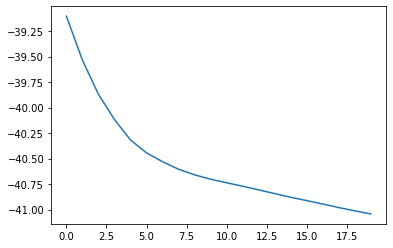

In [12]:
plt.plot(np.arange(len(obj_loss)), obj_loss)

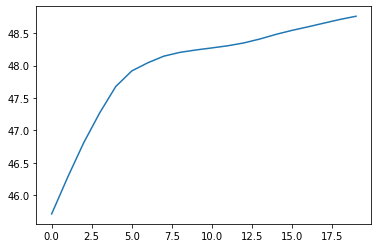

In [13]:
plt.plot(np.arange(len(recon_loss)), recon_loss)

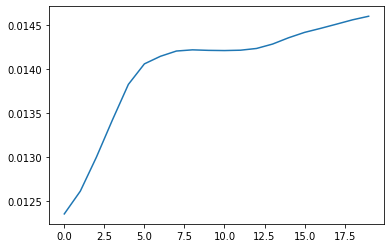

In [14]:
plt.plot(np.arange(len(overlap_loss)), overlap_loss)

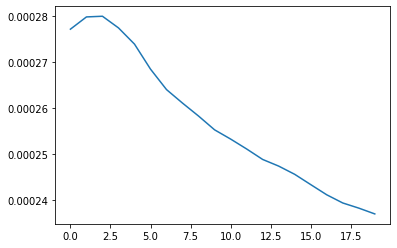

In [15]:
plt.plot(np.arange(len(sparsity_loss)), sparsity_loss)

In [16]:
trainer.trainset.shape

torch.Size([3993996, 41])

In [17]:
traverse = np.arange(-1., 1.1, 0.1).astype(float)

In [18]:
index = np.random.choice(np.arange(len(trainer.trainset)), 500, replace=False)

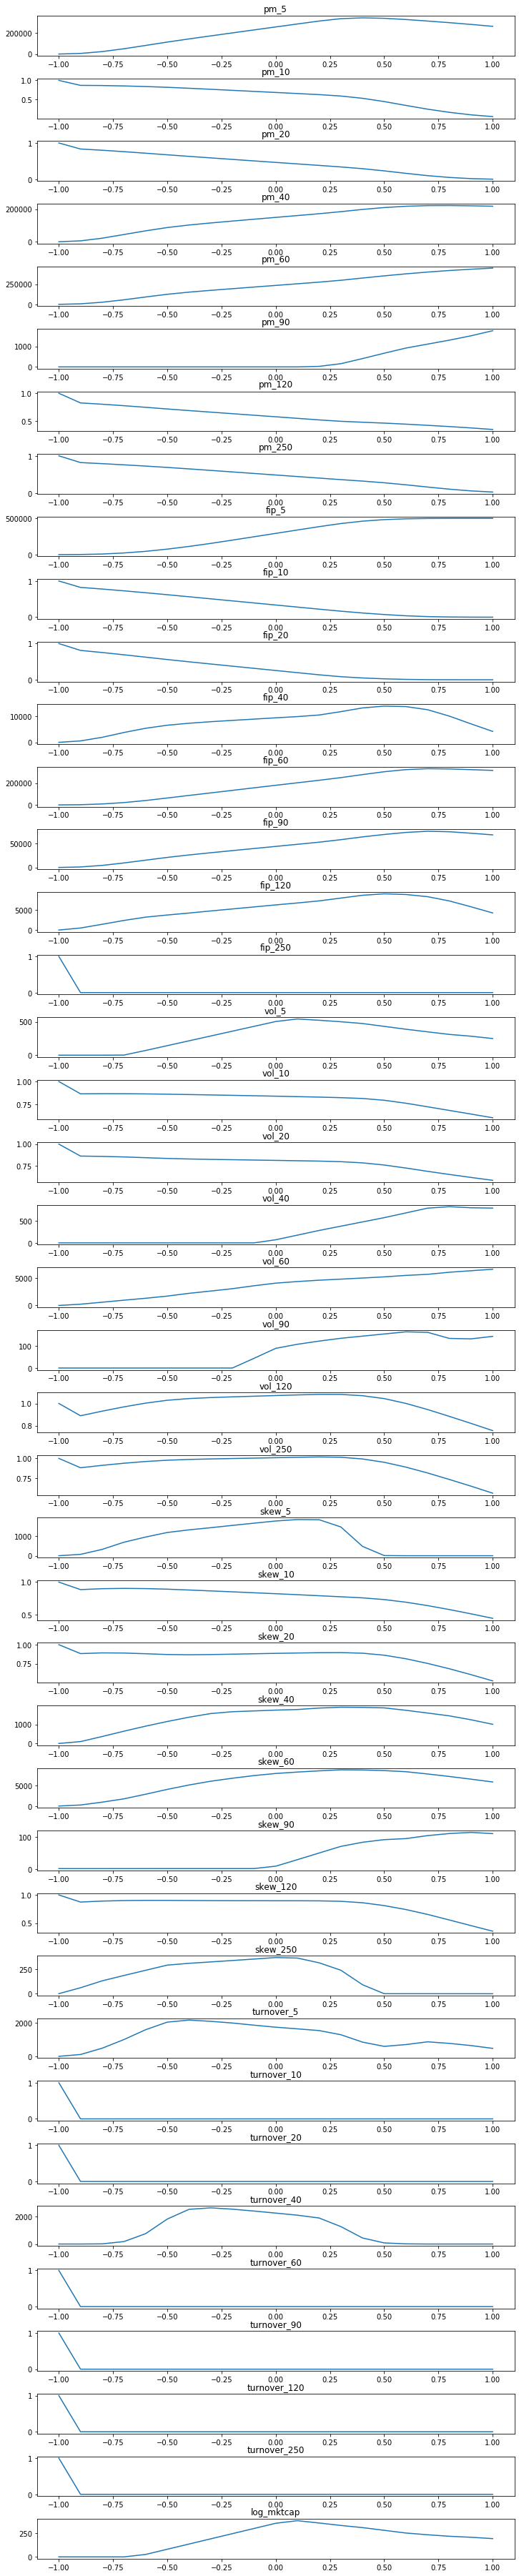

In [19]:
# Style 1
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 0] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

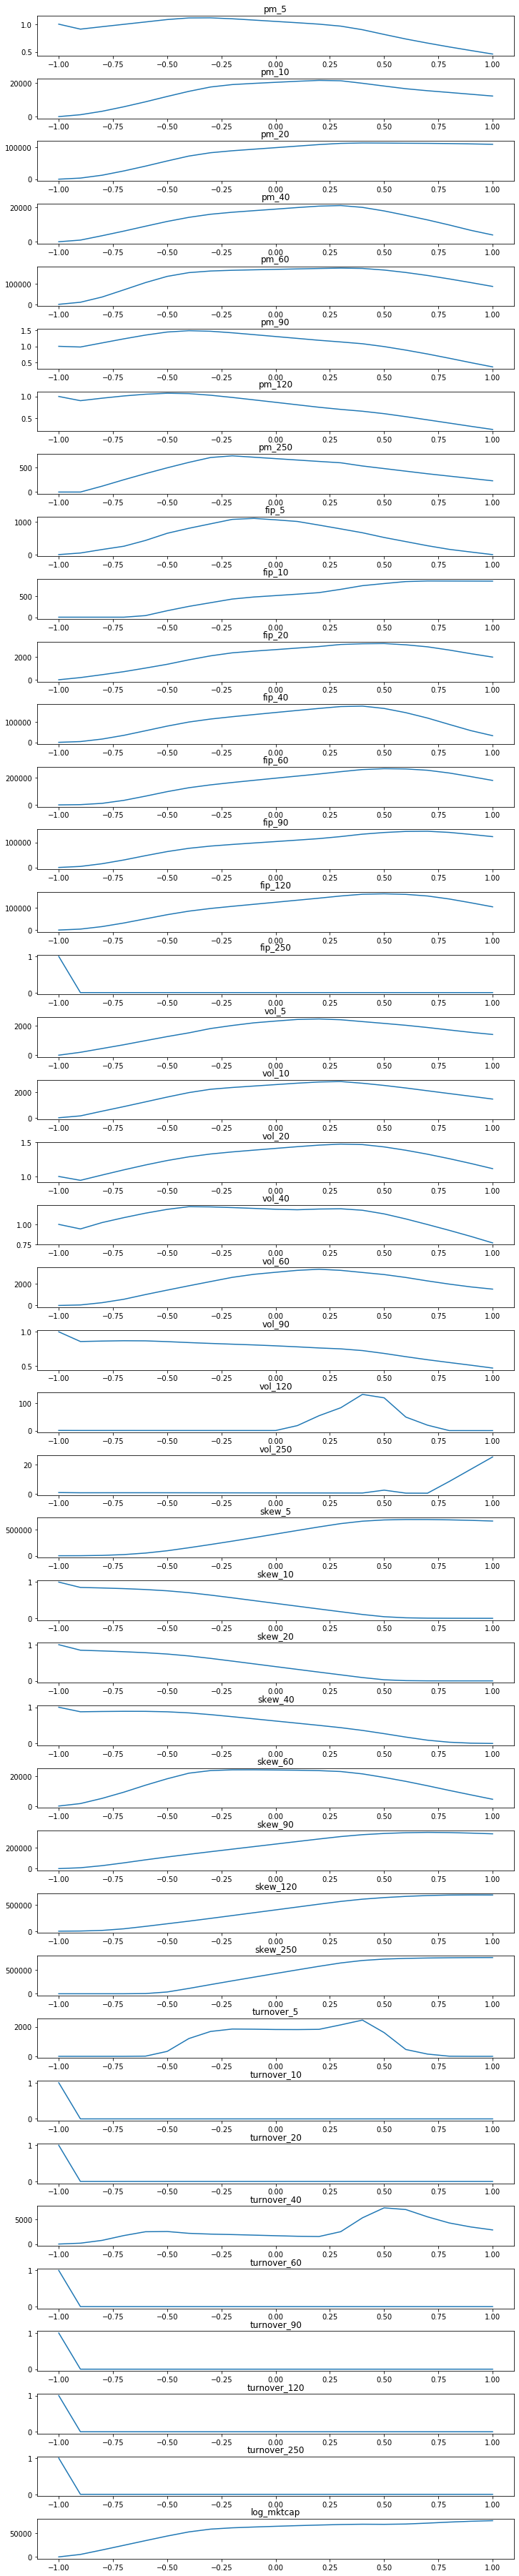

In [20]:
# Style 2
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 1] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

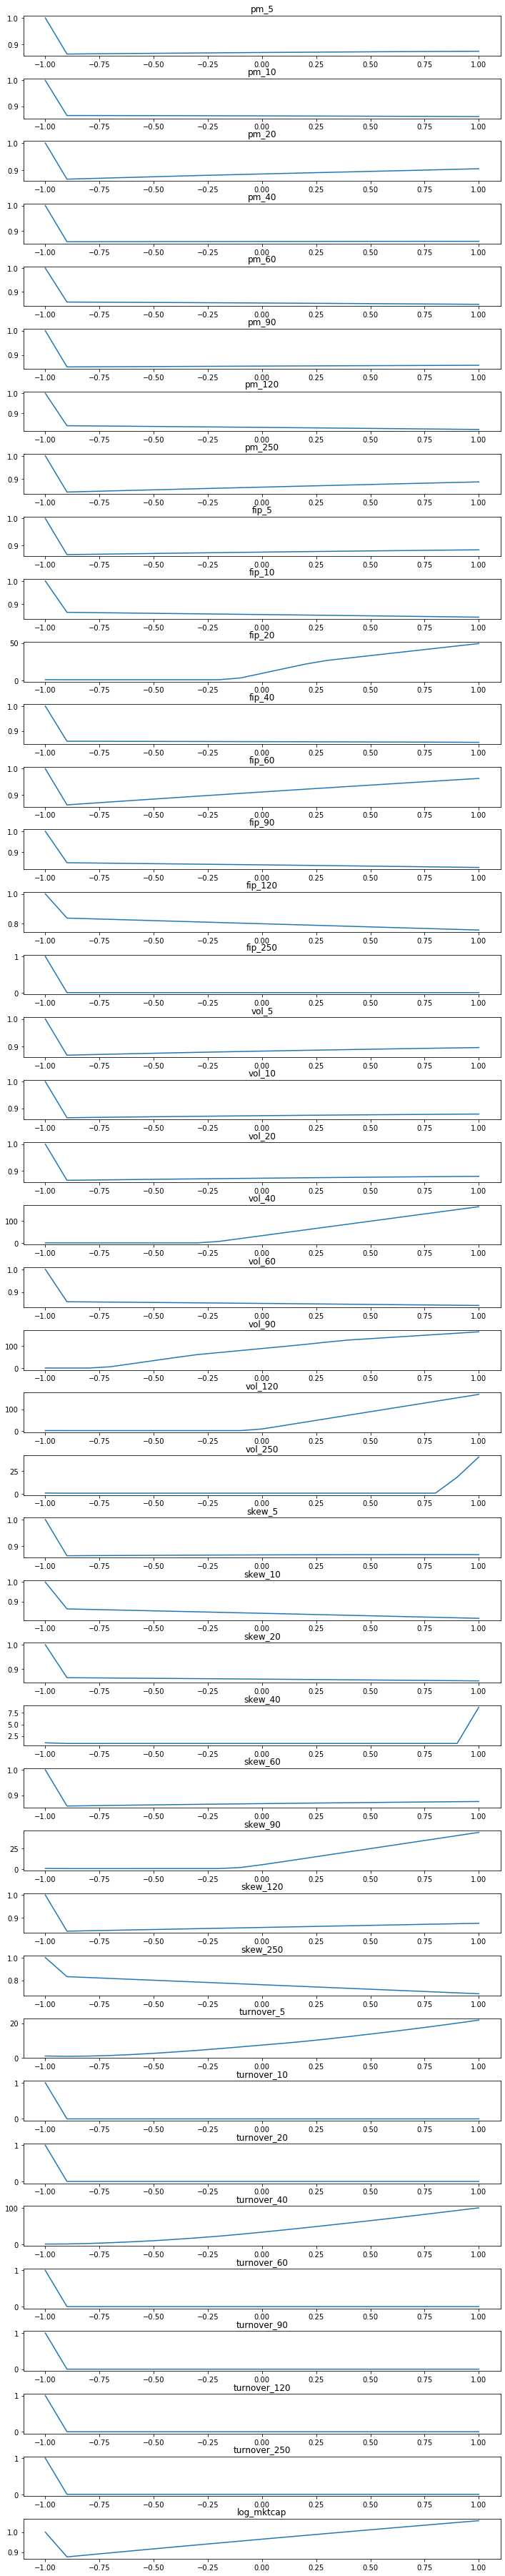

In [21]:
# Style 3
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 2] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

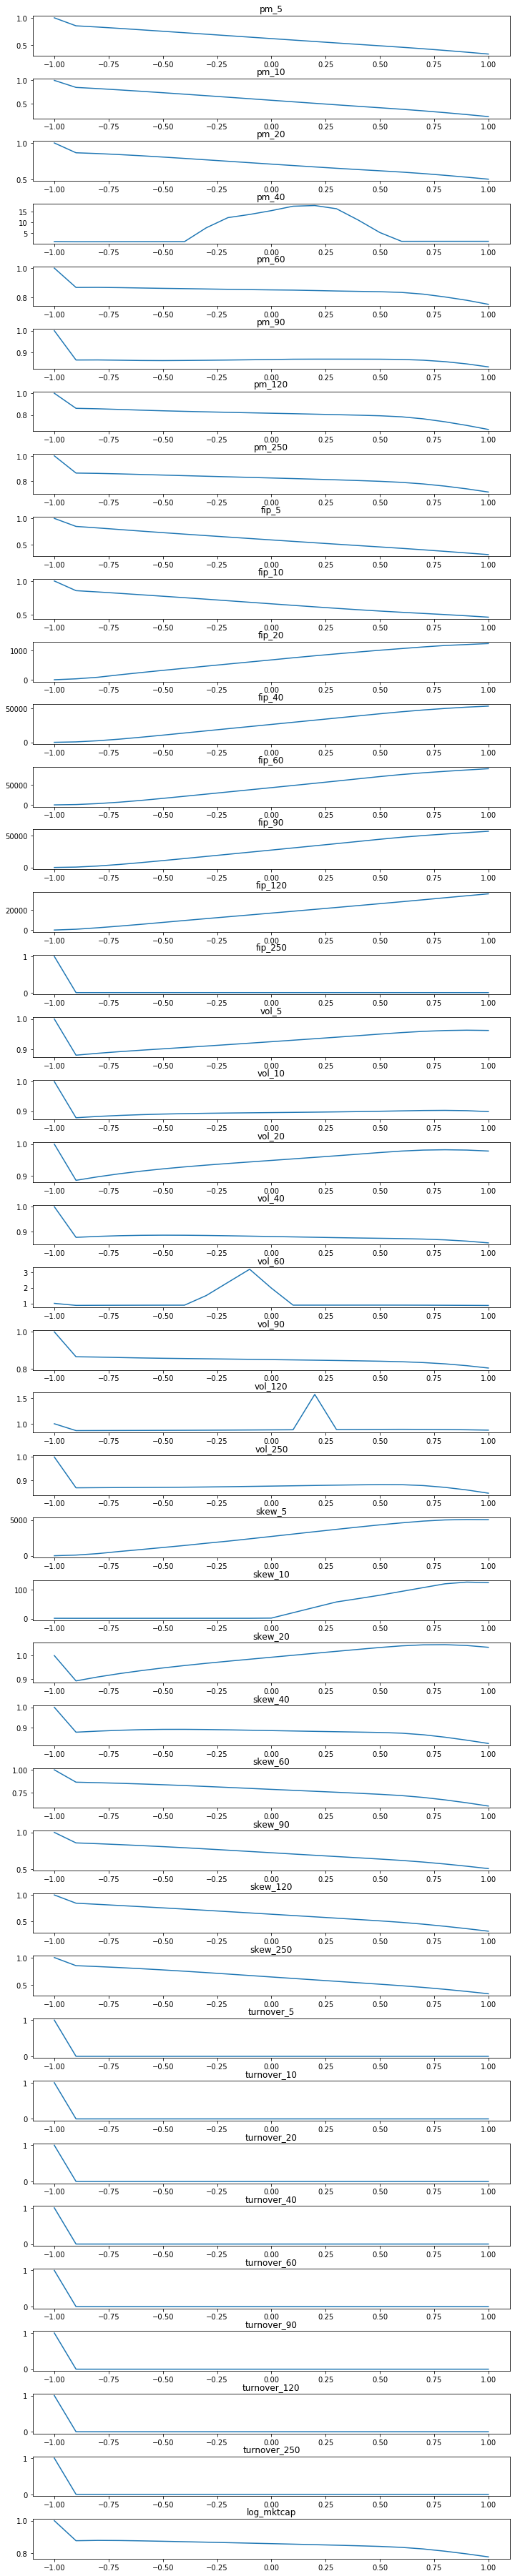

In [25]:
# Style 4
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 3] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

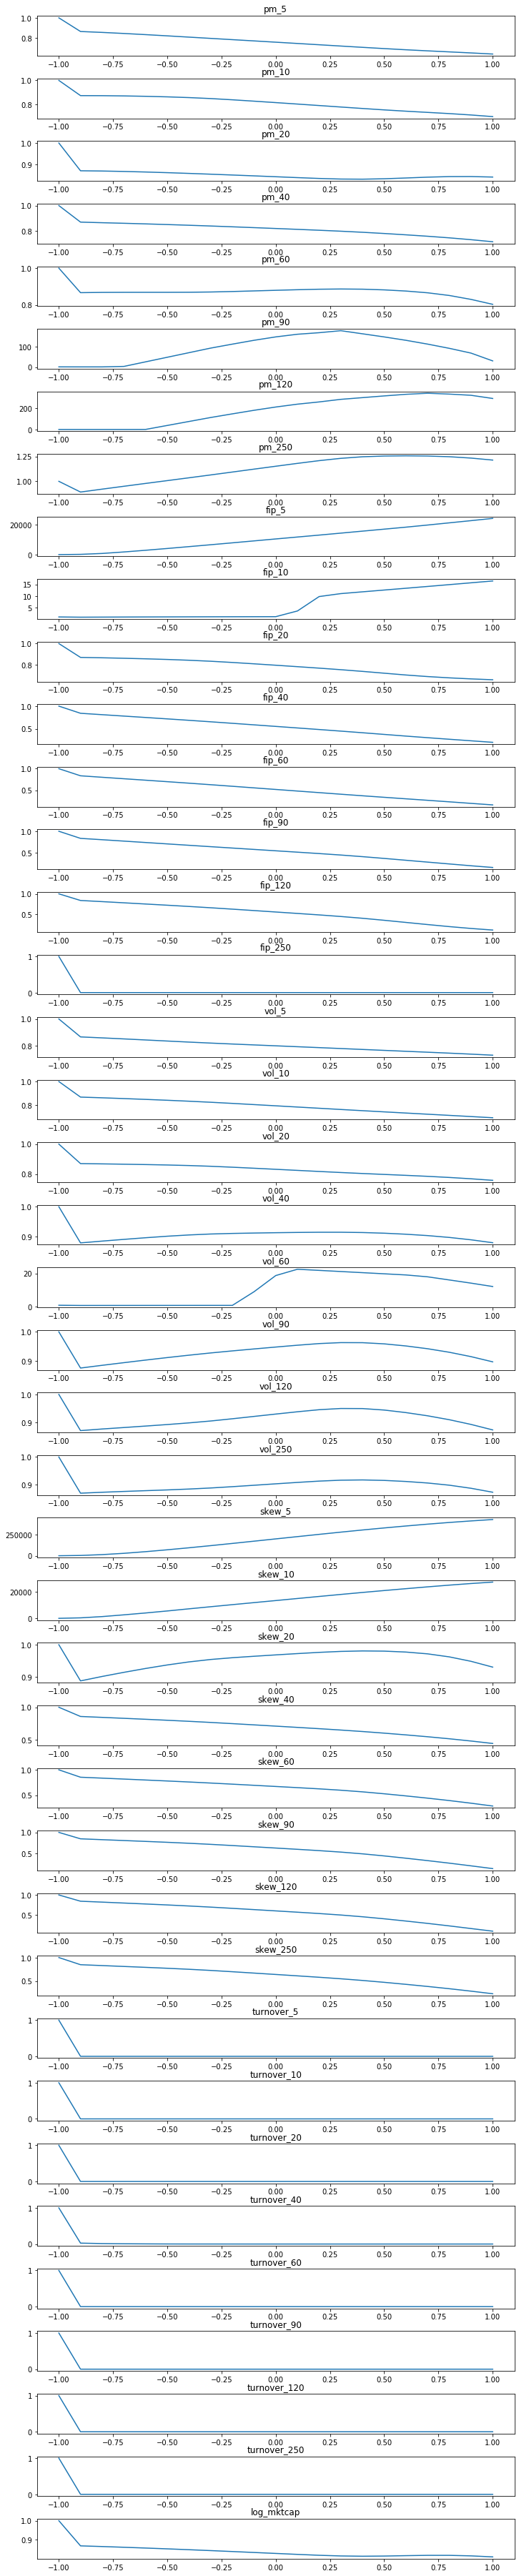

In [26]:
# Style 5
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 4] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

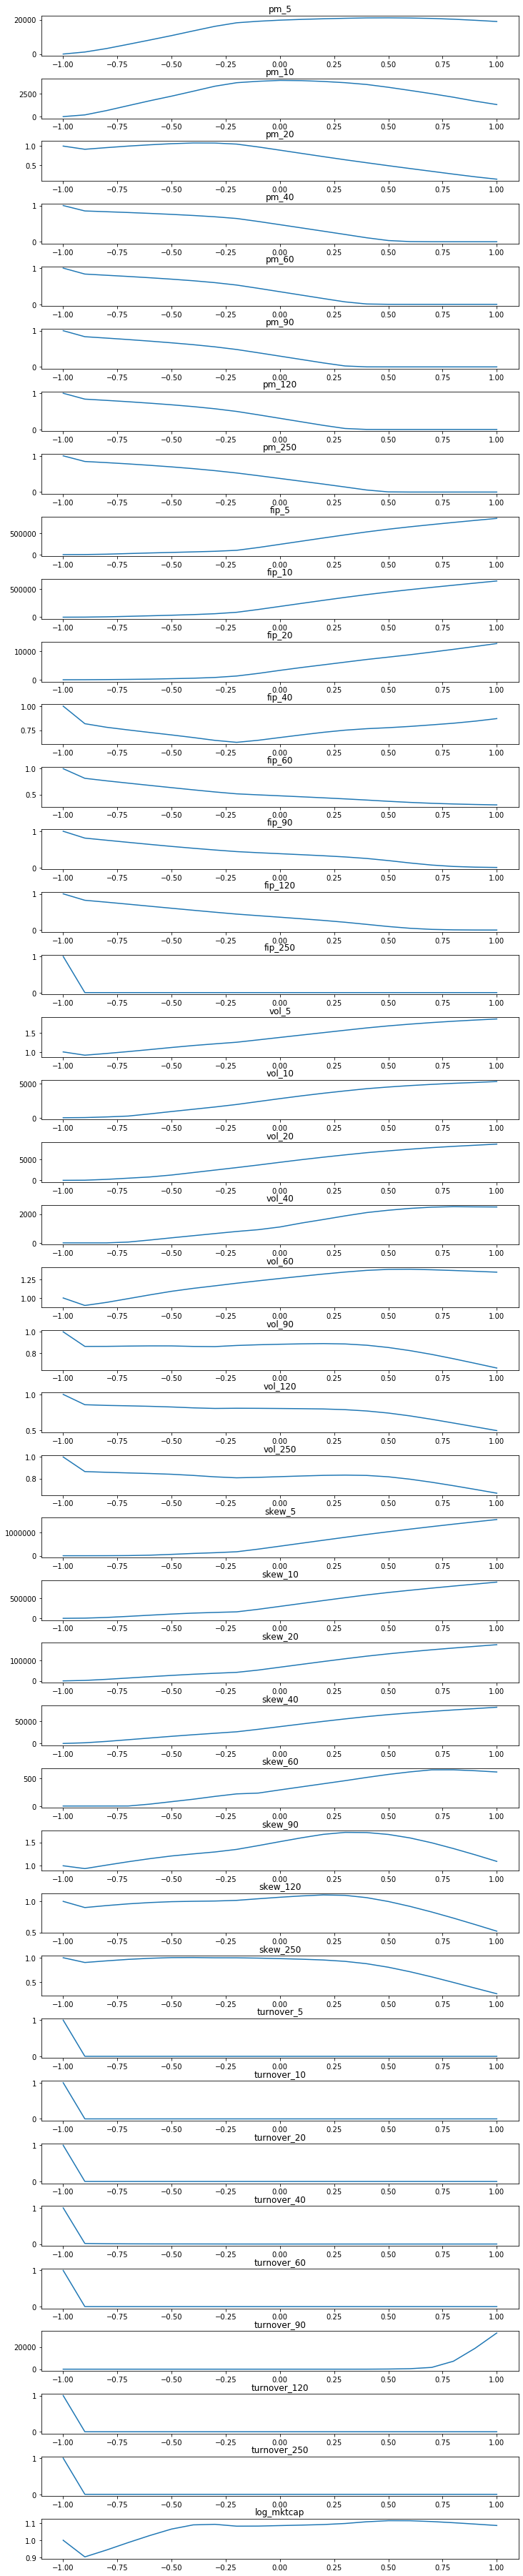

In [27]:
# Style 6
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 5] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

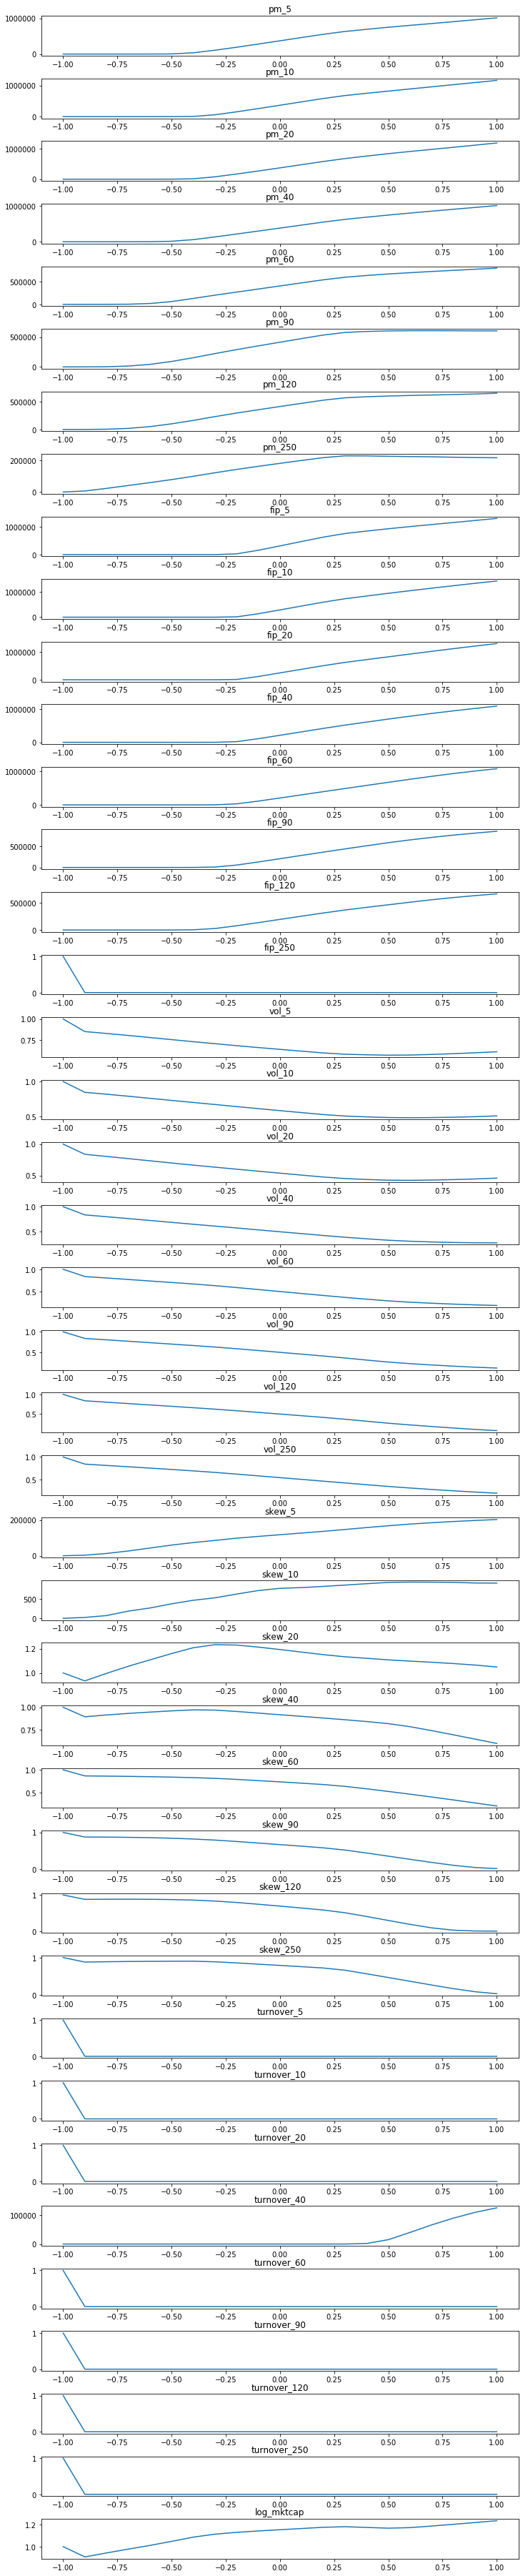

In [30]:
# Style 7
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 6] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

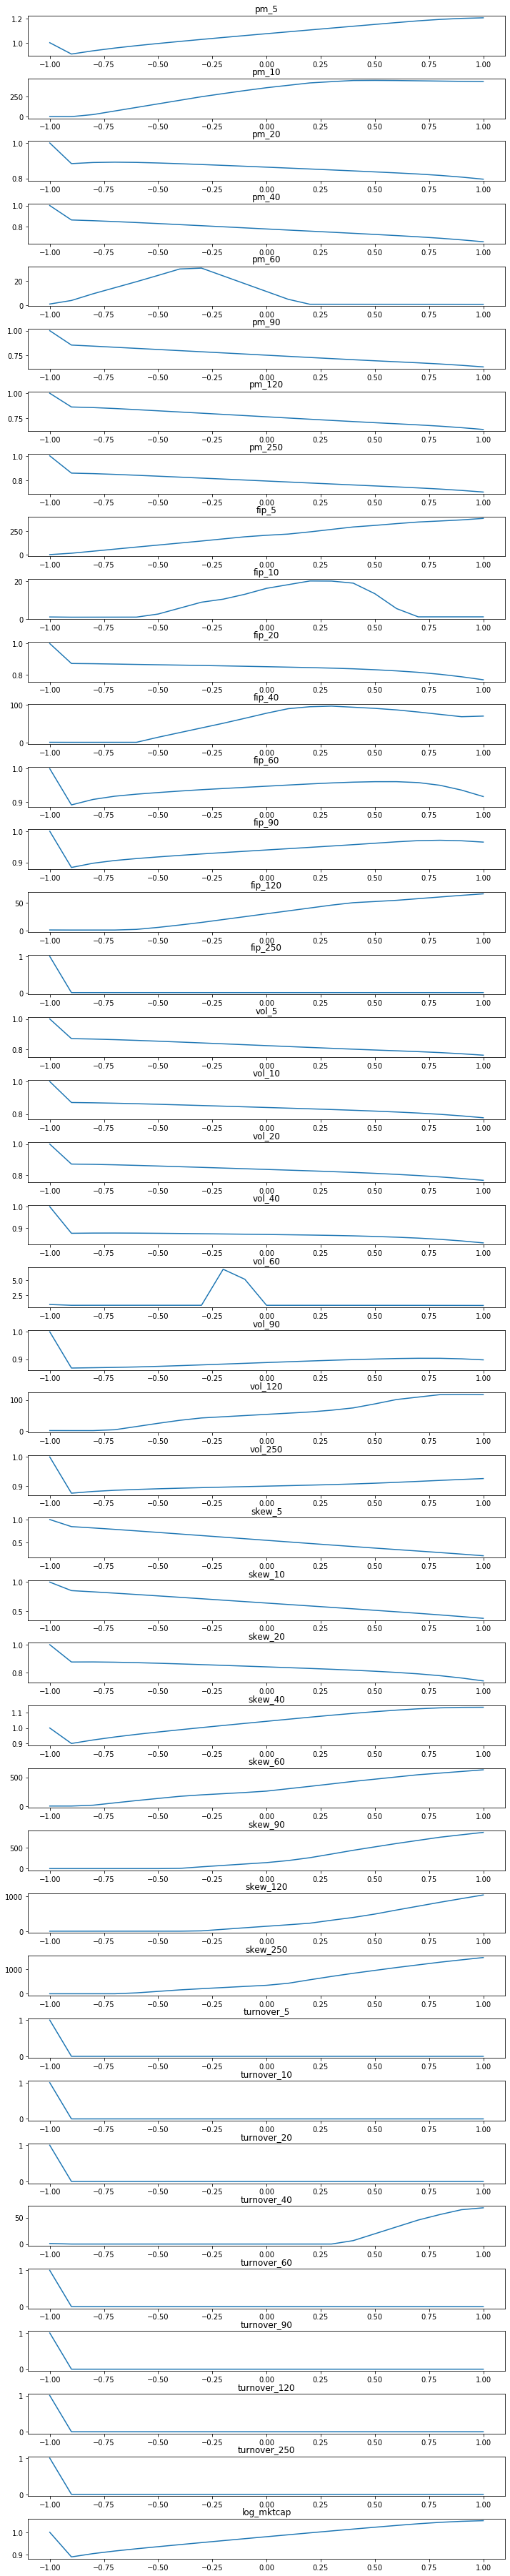

In [31]:
# Style 8
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 7] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

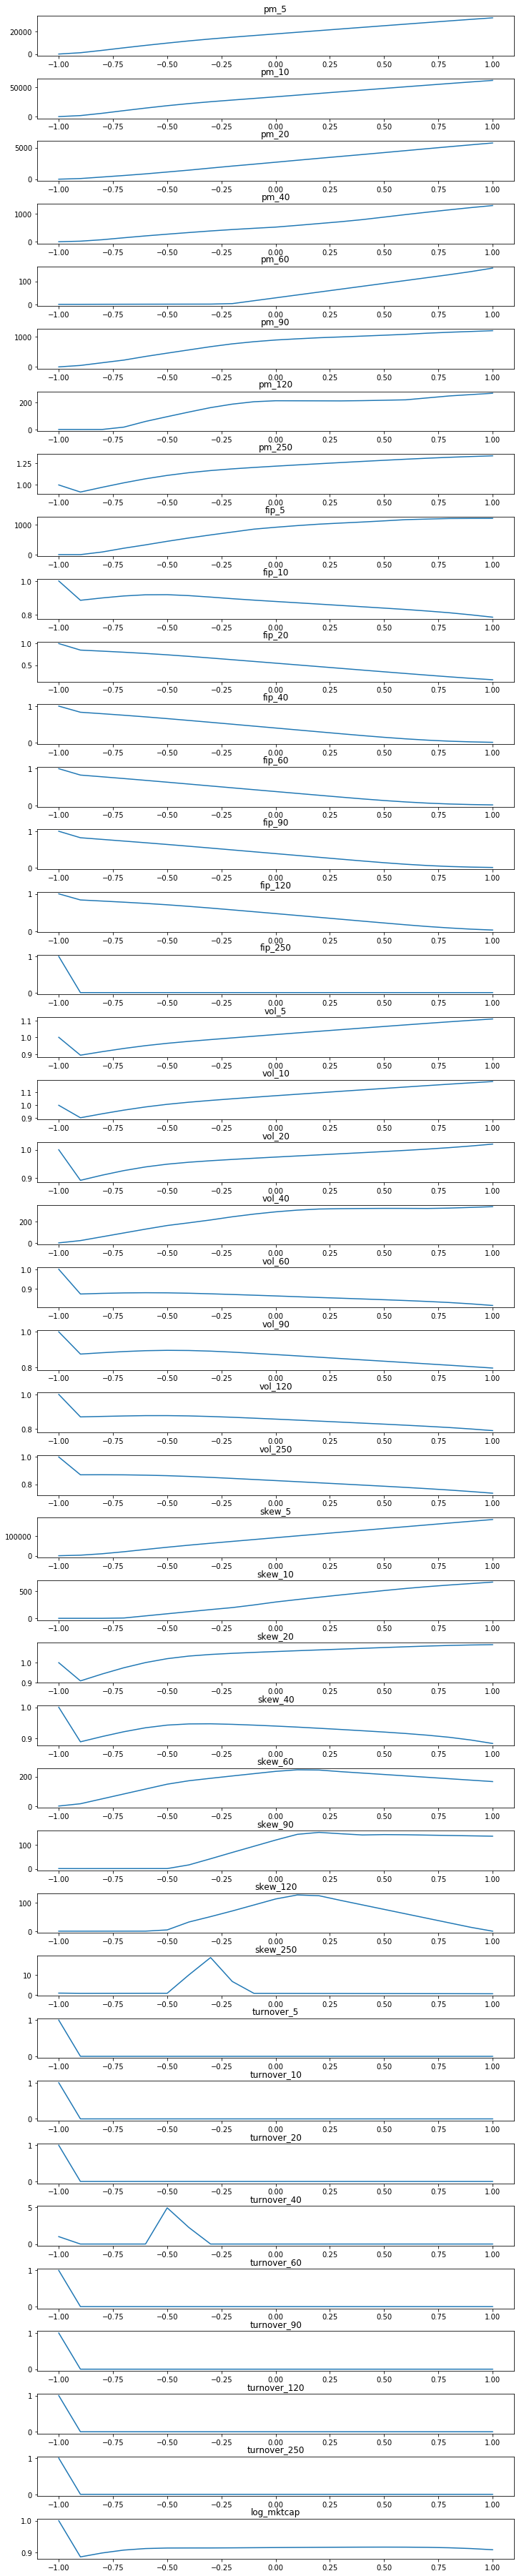

In [32]:
# Style 9
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 8] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

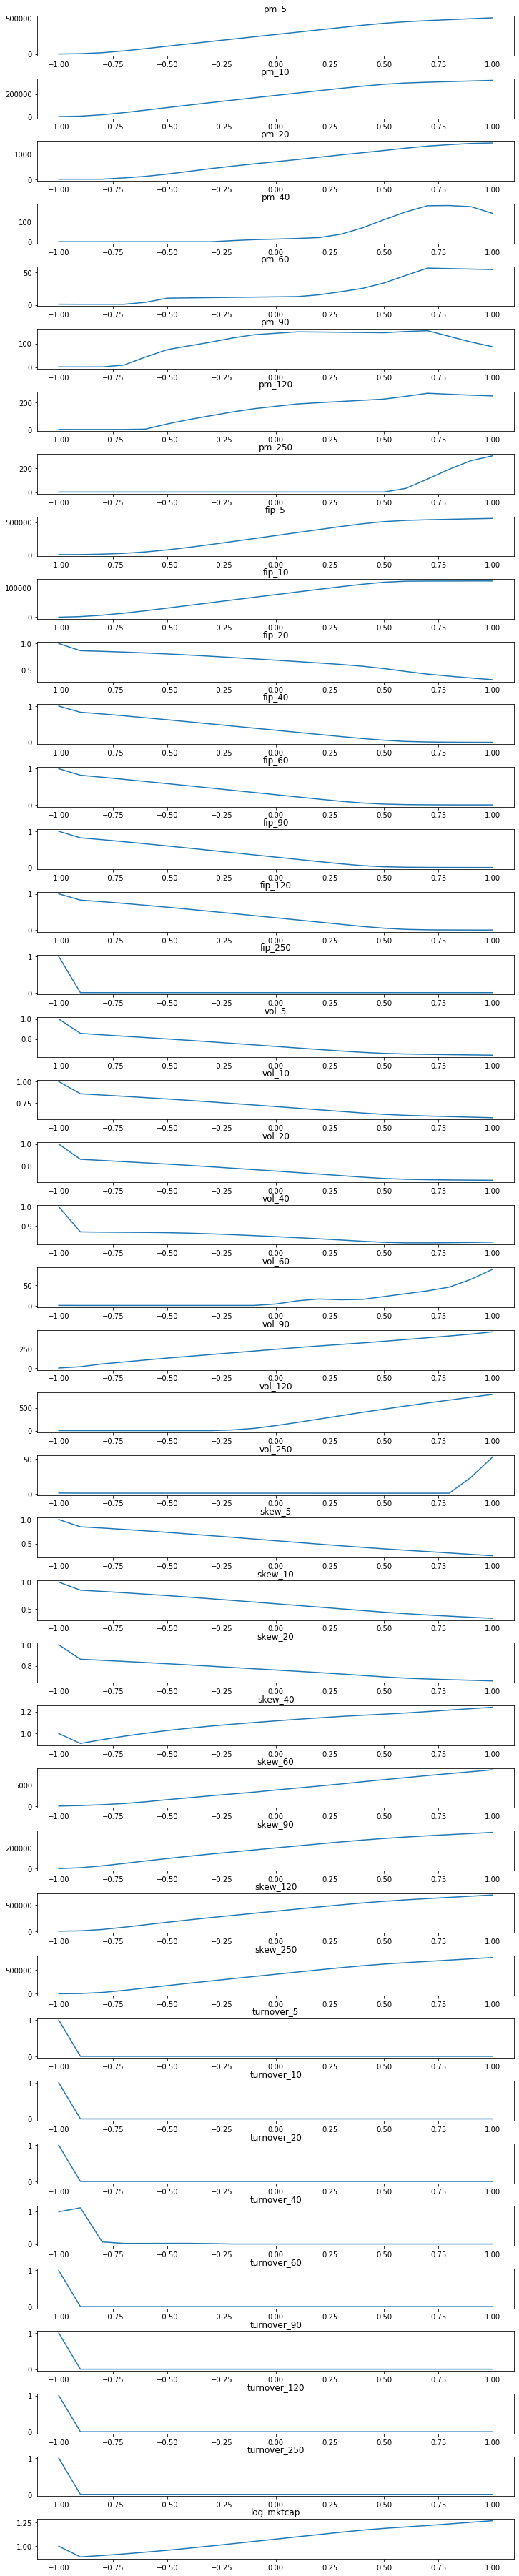

In [33]:
# Style 10
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 9] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

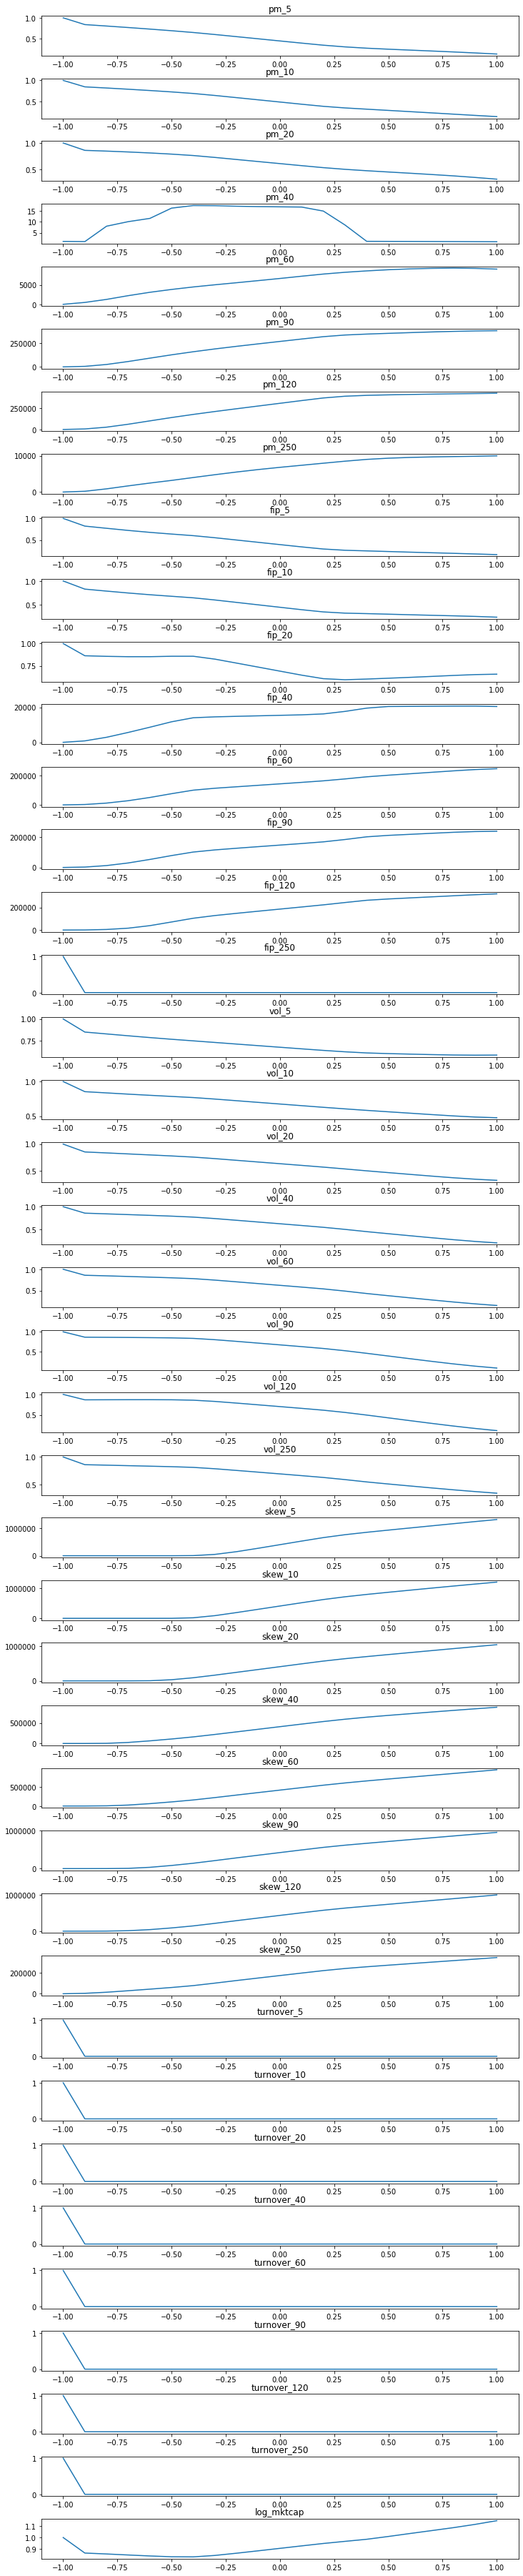

In [34]:
# Style 11
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 10] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

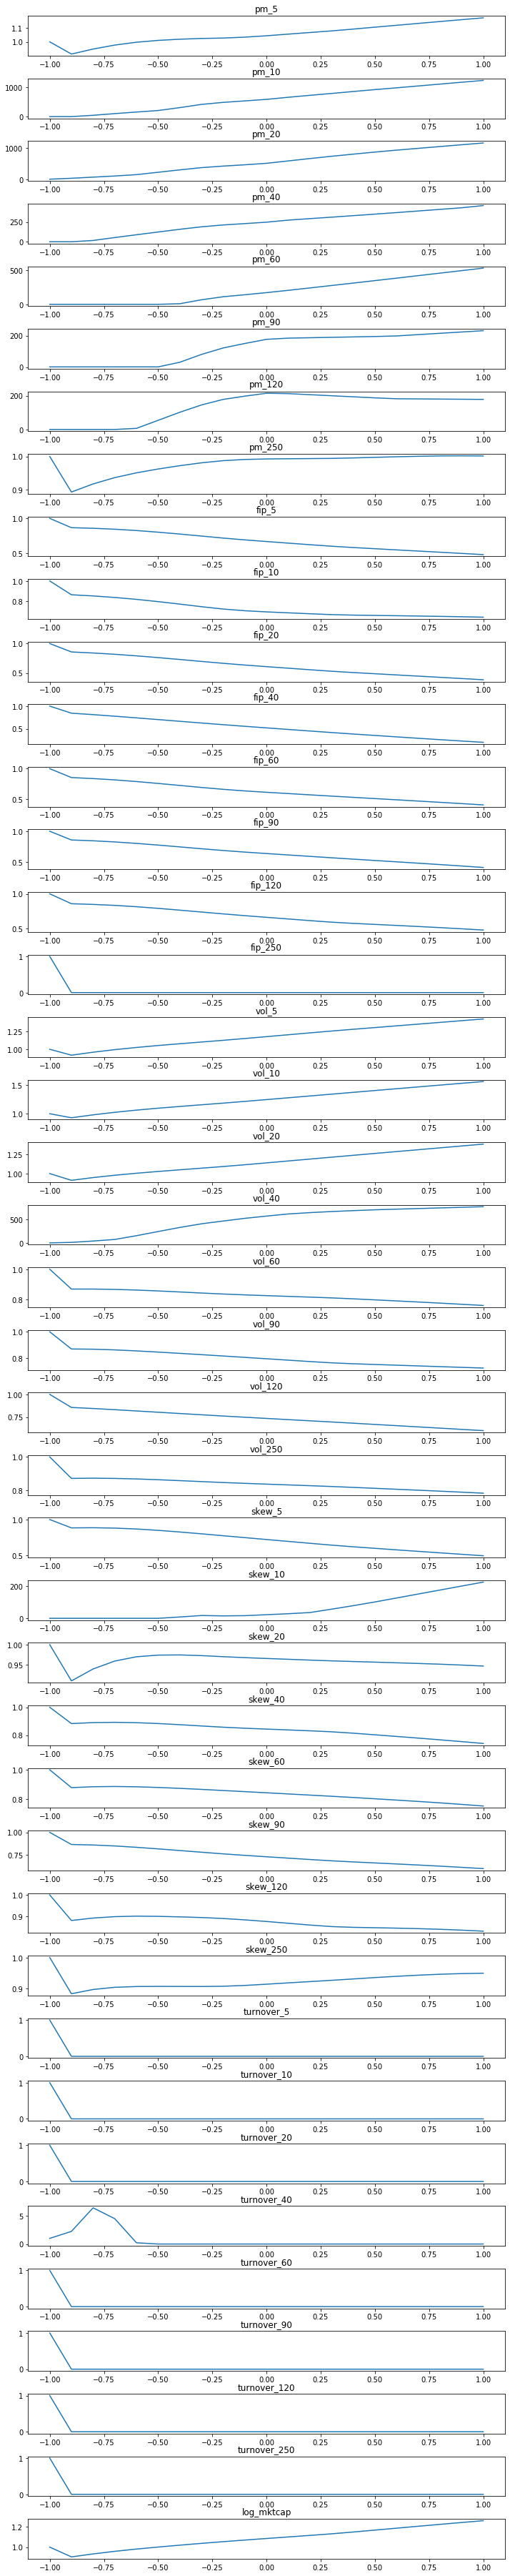

In [35]:
# Style 12
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 11] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

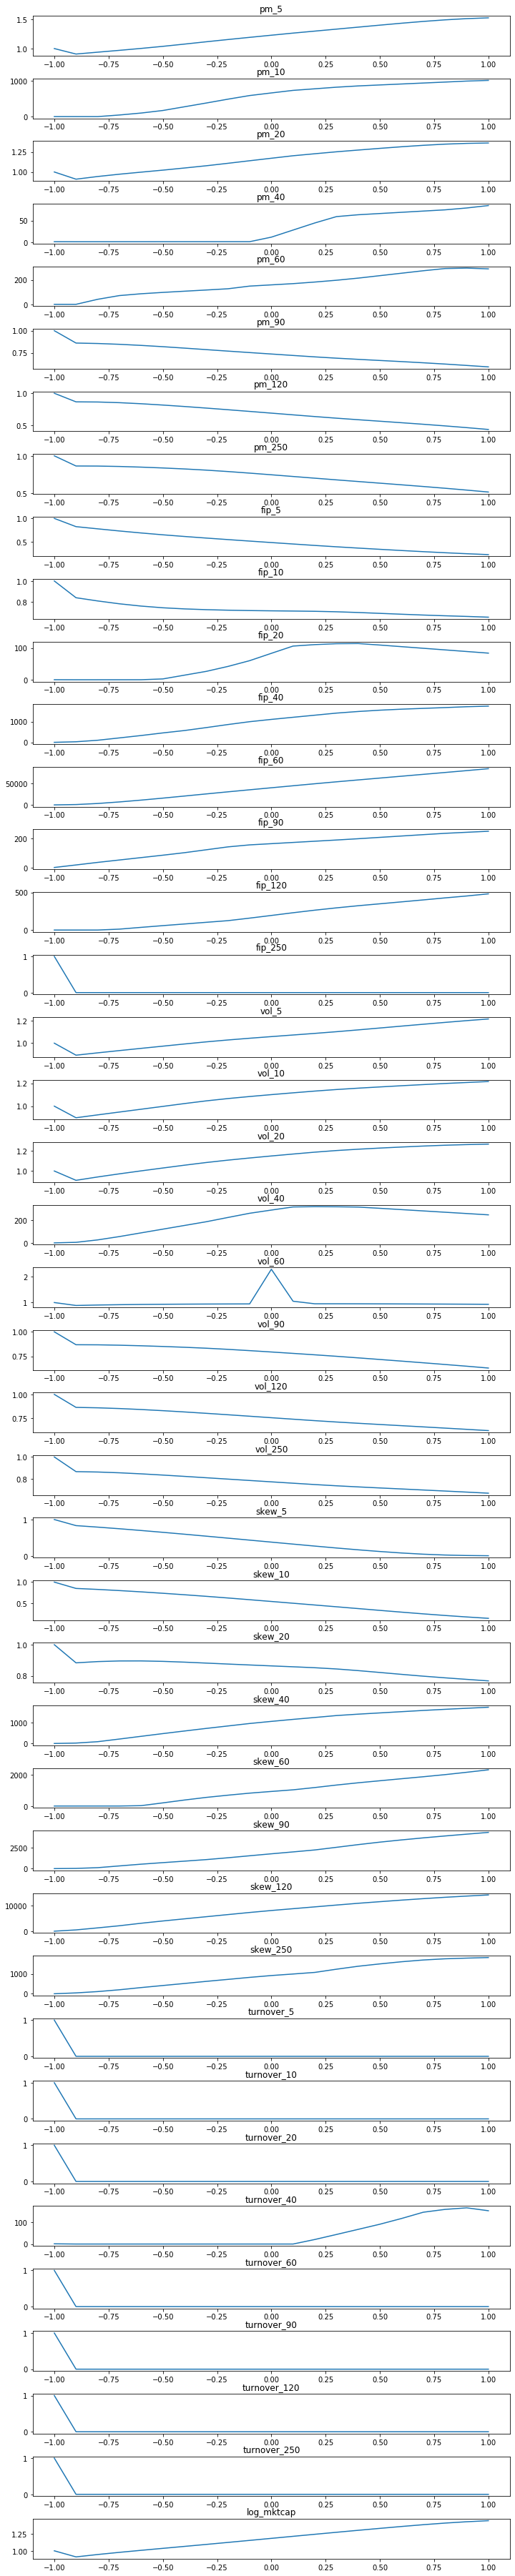

In [36]:
# Style 13
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 12] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

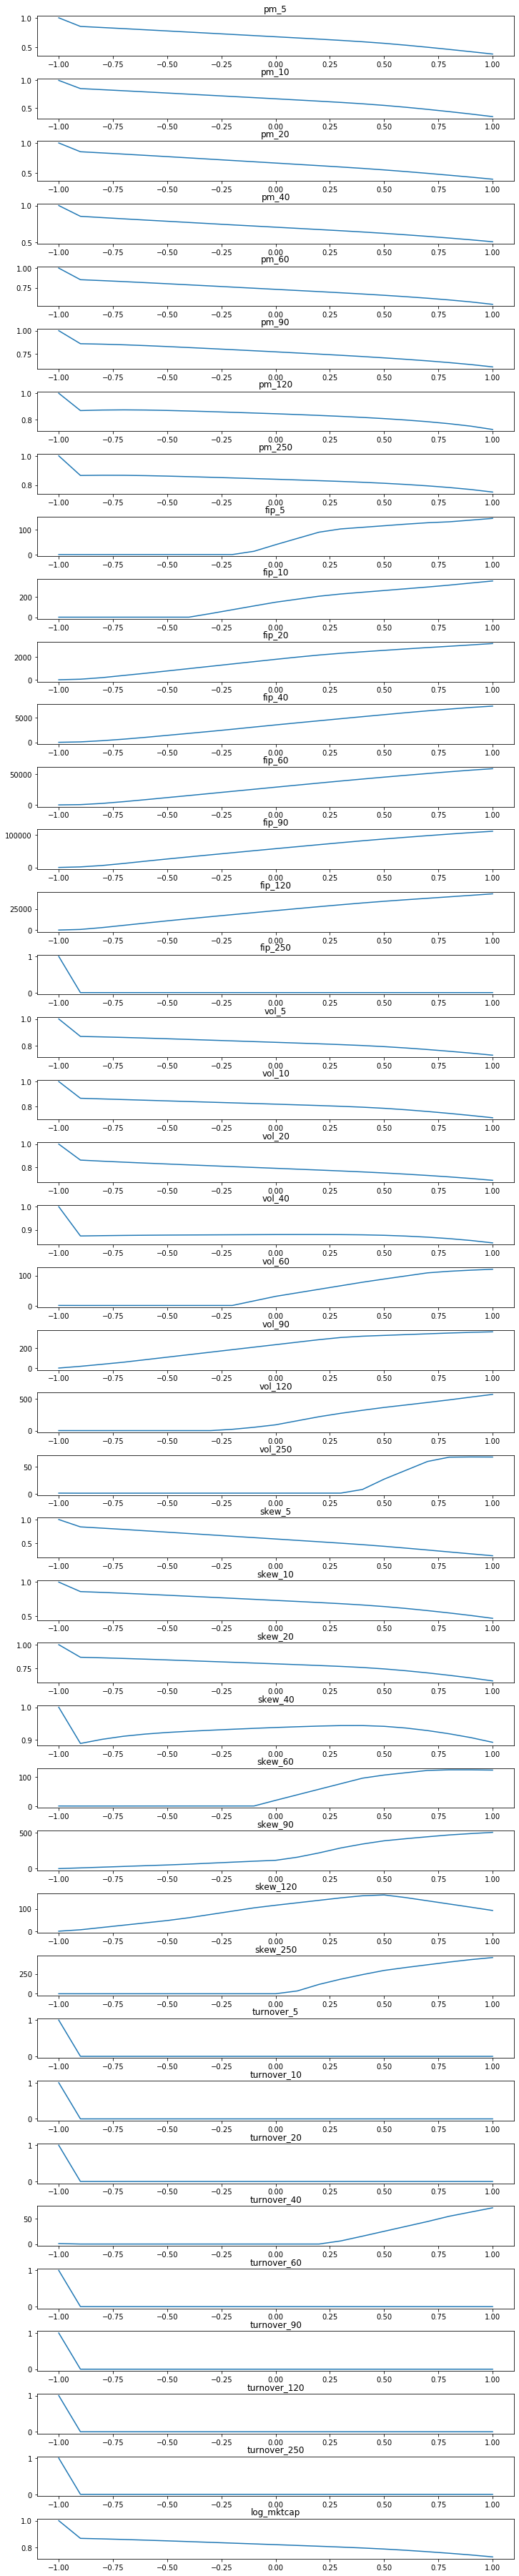

In [37]:
# Style 14
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 13] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

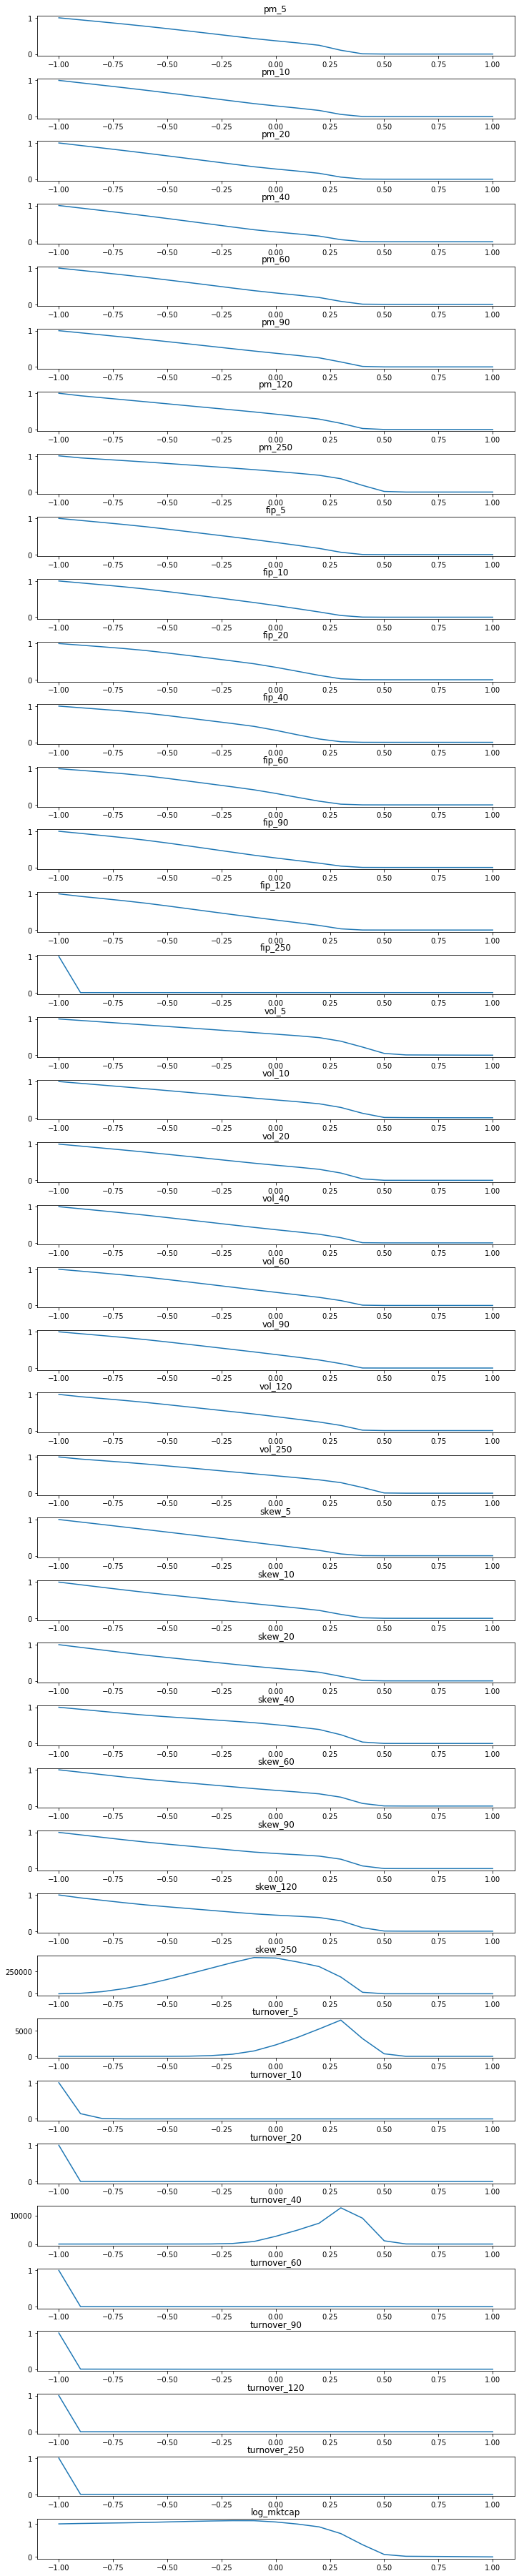

In [43]:
# Style 15
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 14] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

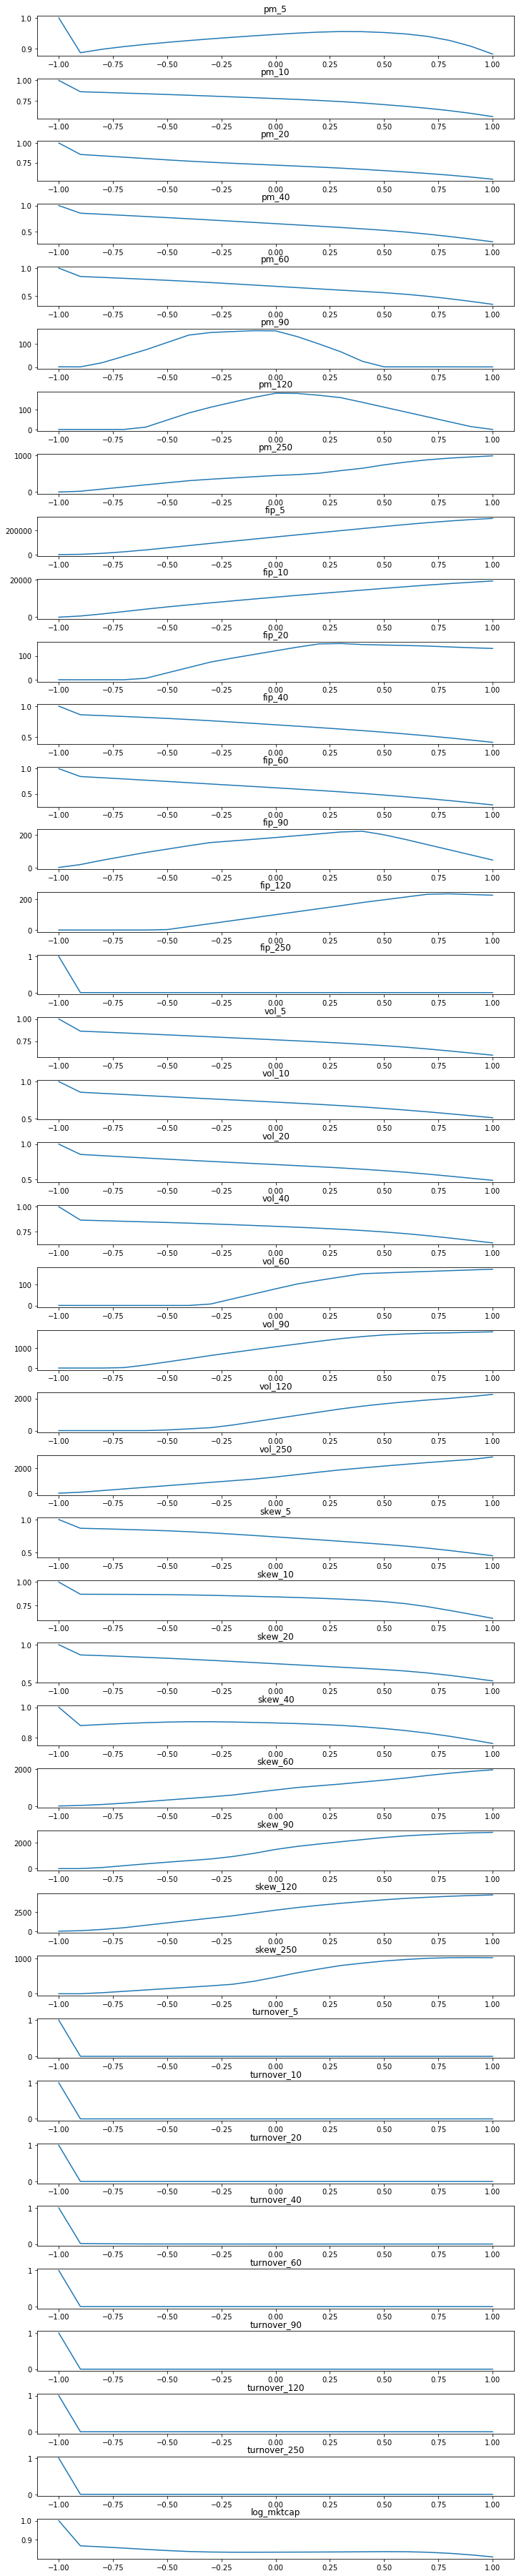

In [39]:
# Style 16
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 15] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

In [24]:
mf

code  trade_date      pm_5     pm_10     pm_20     pm_40  \
0        A000020  2013-01-16  0.317186  0.274228  0.265448  0.576029   
1        A000020  2013-01-17  0.321439  0.312343  0.296576  0.583730   
2        A000020  2013-01-18  0.298178  0.288183  0.256041  0.535444   
3        A000020  2013-01-21  0.296404  0.341285  0.177490  0.472382   
4        A000020  2013-01-22  0.258214  0.278217  0.208626  0.462013   
...          ...         ...       ...       ...       ...       ...   
3993991  A344050  2020-02-24  0.537767  0.000000  0.000000  0.000000   
3993992  A344050  2020-02-25  0.641701  0.000000  0.000000  0.000000   
3993993  A344050  2020-02-26  0.598798  0.654544  0.000000  0.000000   
3993994  A344050  2020-02-27  0.672973  0.651370  0.000000  0.000000   
3993995  A344050  2020-02-28  0.600859  0.630230  0.000000  0.000000   

            pm_60     pm_90    pm_120    pm_250  ...  skew_250  turnover_5  \
0        0.464767  0.523478  0.549239  0.591994  ...  0.734468    0.001167   
1        0.466944  0.532652  0.548410  0.603134  ...  0.734940    0.001108   
2        0.439704  0.525804  0.516215  0.594420  ...  0.735779    0.000817   
3        0.427241  0.550005  0.487227  0.561608  ...  0.728325    0.000745   
4        0.432323  0.499384  0.494755  0.565308  ...  0.729019    0.000699   
...           ...       ...       ...       ...  ...       ...         ...   
3993991  0.000000  0.000000  0.000000  0.000000  ...  0.000000    0.000063   
3993992  0.000000  0.000000  0.000000  0.000000  ...  0.000000    0.000068   
3993993  0.000000  0.000000  0.000000  0.000000  ...  0.000000    0.000053   
3993994  0.000000  0.000000  0.000000  0.000000  ...  0.000000    0.000053   
3993995  0.000000  0.000000  0.000000  0.000000  ...  0.000000    0.000042   

         turnover_10  turnover_20  turnover_40  turnover_60  turnover_90  \
0           0.001047     0.001516     0.001662     0.002244     0.002661   
1           0.001004     0.001437     0.001609     0.002213     0.002639   
2           0.000974     0.001360     0.001540     0.002190     0.002598   
3           0.001013     0.001320     0.001532     0.002166     0.002572   
4           0.000983     0.001250     0.001537     0.002117     0.002542   
...              ...          ...          ...          ...          ...   
3993991     0.000000     0.000000     0.000000     0.000000     0.000000   
3993992     0.000382     0.000000     0.000000     0.000000     0.000000   
3993993     0.000132     0.000000     0.000000     0.000000     0.000000   
3993994     0.000120     0.000000     0.000000     0.000000     0.000000   
3993995     0.000093     0.000000     0.000000     0.000000     0.000000   

         turnover_120  turnover_250  log_mktcap  
0            0.002195      0.001712    0.448285  
1            0.002184      0.001706    0.451232  
2            0.002178      0.001703    0.451096  
3            0.002156      0.001698    0.450006  
4            0.002149      0.001696    0.443772  
...               ...           ...         ...  
3993991      0.000000      0.000000    0.111371  
3993992      0.000000      0.000000    0.108441  
3993993      0.000000      0.000000    0.109373  
3993994      0.000000      0.000000    0.109258  
3993995      0.000000      0.000000    0.099499  

[3993996 rows x 43 columns]

In [29]:
sam = mf[mf['code'] == 'A005930']
sam_v = torch.FloatTensor(sam.values[:, 2:].astype(float)).to(ssvae.device)

In [32]:
qz_x, px_z, sam_ss = ssvae(sam_v, K=100)

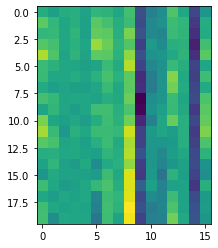

In [40]:
plt.imshow(sam_ss[-20:].detach().cpu().numpy())

In [41]:
sam_ss[-20:]

tensor([[ 1.5403e-02,  2.8816e-04,  1.5256e-02,  1.9784e-02,  2.1705e-03,
          2.7826e-02,  2.4334e-02,  5.7863e-03,  3.9755e-02, -9.7819e-02,
         -3.9408e-02, -2.3347e-02,  4.7619e-02,  9.1536e-03, -1.0727e-01,
         -1.3604e-02],
        [ 5.4162e-02,  2.9002e-02,  7.0109e-03,  1.9099e-02,  1.9568e-03,
          5.3865e-02,  4.1202e-02,  1.6928e-02,  3.5934e-02, -1.0091e-01,
         -2.8676e-02, -1.6994e-02,  3.5443e-02,  2.7481e-02, -1.2133e-01,
          1.6174e-02],
        [ 2.9125e-02,  3.0586e-02,  8.0767e-03,  2.6370e-02,  1.3953e-03,
          5.8426e-02,  5.4287e-02,  1.7841e-02,  6.9677e-02, -9.3515e-02,
         -2.9496e-02, -3.3138e-02,  3.4091e-02,  2.6527e-02, -1.3080e-01,
          1.4928e-02],
        [ 5.0968e-02,  4.2084e-02,  1.0344e-02,  2.1483e-02,  7.9245e-03,
          8.5099e-02,  6.2553e-02,  2.4864e-02,  4.8565e-02, -1.1544e-01,
         -9.3096e-03, -2.4290e-02,  1.8437e-02,  2.3243e-02, -1.4379e-01,
          3.9604e-02],
        [ 9.3868e-02